In [1]:
def plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,x_lim=[0,1],y_lim=[0,1],eq_min='true',N=11,title='unknown.png'):

    # ----- PLOTTING -----
    x = np.linspace(0,1,100)
    xx = np.linspace(xB,xD,100)
    
    # Plot results
    fig, ax = plt.subplots()

    plt.plot(x,x,color='k',linestyle='--')
    plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
    plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
    plt.plot([xF,xq],[xF,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
    plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
    plt.plot(x_eq,y_eq,color='k')
    
    if eq_min == 'true':
        A = x_eq[-1]
    else:
        A = y_eq[-1]
    
    plt.plot([x_eq[-1],x_eq[-1]],[0,A],marker='*',color='k',linestyle=':')
    plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
             markerfacecolor='tab:orange',markeredgecolor='tab:orange')
    plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')

    # Plot Labels, limits
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xticks(np.linspace(x_lim[0],x_lim[1],N))
    plt.yticks(np.linspace(y_lim[0],y_lim[1],N))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.tick_params(top='true', right='true', direction='in')
    plt.grid()

    # Pretty plot parameters
    font = {'family' : 'serif',
             'size'   : 12,
             'serif':  'cmr10'
             }

    plt.rcParams["figure.figsize"] = (5,3)
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": "cmr10",
    })

    plt.show()
    
    fig.savefig(title,dpi=150,bbox_inches='tight')

# Benzene - Ethylbenzene

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import root_scalar

# Import stepping function from parent directory, may need to modify
# if the location is different
import os
import sys
current = os.path.dirname(os.path.abspath('CHEN_3100_HW_8'))
parent = os.path.dirname(current)
sys.path.append(parent + '\CHEN_3100_Toolkit')
from CHEN_3100_Stepping import stepping_MT


# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 8 - B-E Binary Data.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x_1 = np.array(df['x'])
y_1 = np.array(df['y'])
p1_sat = np.array(df['P2 (kPa)'])
p2_sat = np.array(df['P1 (kPa)'])
P = 101.325 # kPa, system pressure


# Fit a 5th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a5, a4, a3, a2, a1: a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1, y_1)

# Print parameters
print('5th order polynomial fit parameters: ')
print(params)
print('\n')

# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a5,a4,a3,a2,a1] = params
# Print estimated R^2 value
R2 = 1 - np.sum((y_1-eq_line(x_1,a5,a4,a3,a2,a1))**2)/np.sum((y_1-np.mean(y_1))**2)
print('R^2: %0.3f' % R2)




,T (F),T (K),T (C),P1 (kPa),P2 (kPa),x,y
0,176.3,353.3,80.2,101.475,16.863,1.00,1.00
1,187.5,359.5,86.4,122.400,21.271,0.79,0.96
2,198.7,365.7,92.6,146.600,26.578,0.62,0.90
3,209.9,372.0,98.8,174.300,32.916,0.48,0.83
4,221.1,378.2,105.0,205.900,40.425,0.37,0.75
5,232.3,384.4,111.3,241.800,49.258,0.27,0.65
6,243.5,390.6,117.5,282.200,59.577,0.19,0.52
7,254.7,396.9,123.7,327.500,71.552,0.12,0.38
8,265.9,403.1,129.9,378.000,85.365,0.05,0.20
9,277.1,409.3,136.2,434.200,101.207,0.00,0.00


5th order polynomial fit parameters: 
[  3.40670862 -10.90230471  14.04655373  -9.74357171   4.19279902]


Relative error in fit parameters: 
[0.55789634 0.41510025 0.26548704 0.12723835 0.03311091]


R^2: 1.000


D = 12391.304
B = 17608.696


C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


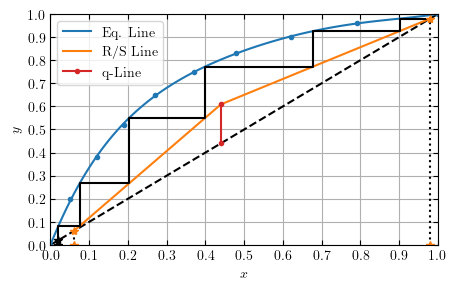

Bottoms Composition: 0.021
0.60875
1.4440789473684212
-0.026644736842105273


In [4]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
xF = 0.44
xD = 0.98
xB = 0.06
F = 30000 # mol/hr
R = 2.2
xq = xF

# Distillate, Bottoms Flow
D = F*(xF-xB)/(xD-xB)
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
yq = mR*xq+bR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

y = lambda x: eq_line(x,a5,a4,a3,a2,a1)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],title='CHEN_3100_HW_8_1.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])

print(yq)
print(mS)
print(bS)

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


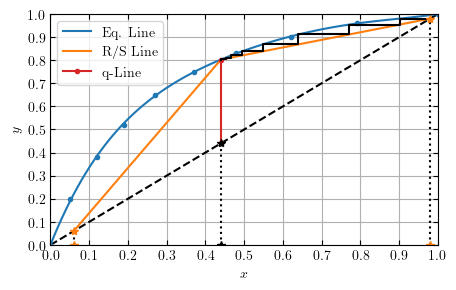

Bottoms Composition: 0.440
0.8025710247996254
0.32857217629699
0.4893633607330607
0.4893633607330605


In [5]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.44
xD = 0.98
xB = 0.06
F = 30000 # mol/hr

xq = xF
yq = y(xq)


# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],title='CHEN_3100_HW_8_2.png')


print('Bottoms Composition: %0.3f' % x_eq[-1])
print(yq)
print(mR)
print(mR/(1-mR))
print(xD/bR-1)

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


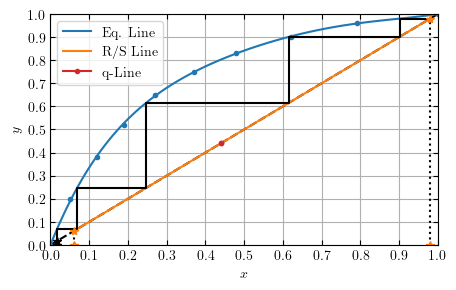

Bottoms Composition: 0.017


In [6]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.44
xD = 0.98
xB = 0.06
F = 30000 # mol/hr

xq = xF
yq = xq

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],title='CHEN_3100_HW_8_3.png')


print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


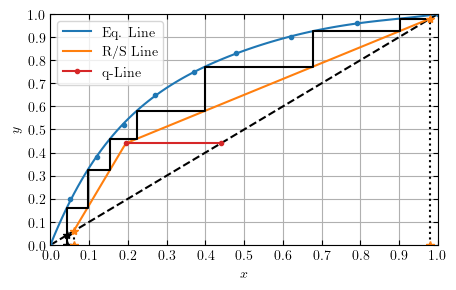

Bottoms Composition: 0.043
0.19454545454545458
2.8243243243243237
-0.10945945945945941
0.5481481481481484
0.5481481481481484


In [7]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.44
xD = 0.98
xB = 0.06
F = 30000 # mol/hr
R = 2.2

yq = xF

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
xq = (yq-bR)/mR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],title='CHEN_3100_HW_8_4.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(xq)
print(mS)
print(bS)
print(1/(mS-1))
print(-xB/bS)

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


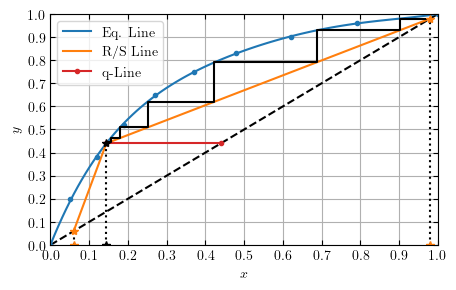

Bottoms Composition: 0.144
0.1443810087246349
0.6462275338857772
1.8266756058882472
1.8266756058882474


In [8]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.44
xD = 0.98
xB = 0.06
F = 30000 # mol/hr

yq = xF
sol = root_scalar(lambda x: y(x)-yq, method='secant', x0=xF)
xq = sol.root


# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_8_5.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(xq)
print(mR)
print(mR/(1-mR))
print(xD/bR-1)

# n-Heptane Toluene

In [9]:
# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 8 - H-T Binary Data.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x_1 = np.array(df['x'])
y_1 = np.array(df['y'])
p1_sat = np.array(df['P1 (kPa)'])
p2_sat = np.array(df['P2 (kPa)'])
P = 101.325 # kPa, system pressure


# Fit a 5th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a5, a4, a3, a2, a1: a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1, y_1)

# Print parameters
print('5th order polynomial fit parameters: ')
print(params)
print('\n')
# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a5,a4,a3,a2,a1] = params

# Print estimated R^2 value
R2 = 1 - np.sum((y_1-eq_line(x_1,a5,a4,a3,a2,a1))**2)/np.sum((y_1-np.mean(y_1))**2)
print('R^2: %0.3f' % R2)

,T (F),T (K),T (C),P1 (kPa),P2 (kPa),x,y
0,209.3,371.6,98.5,101.4,70.745,1.000,1.000
1,211.7,373.0,99.8,105.5,73.732,0.871,0.906
2,214.2,374.3,101.2,109.7,76.818,0.747,0.808
3,216.6,375.7,102.5,114.1,80.005,0.628,0.707
4,219.0,377.0,103.9,118.6,83.297,0.513,0.600
5,221.5,378.4,105.2,123.2,86.694,0.403,0.490
6,223.9,379.7,106.6,127.9,90.200,0.297,0.374
7,226.4,381.1,107.9,132.8,93.817,0.194,0.255
8,228.8,382.4,109.3,137.9,97.548,0.095,0.130
9,231.2,383.8,110.7,143.1,101.394,0.000,0.000


5th order polynomial fit parameters: 
[ 0.18441874 -0.49505969  0.58043598 -0.6996274   1.42988993]


Relative error in fit parameters: 
[0.54824401 0.50487747 0.37351257 0.11018712 0.00657261]


R^2: 1.000


D = 180.233
B = 69.767


C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


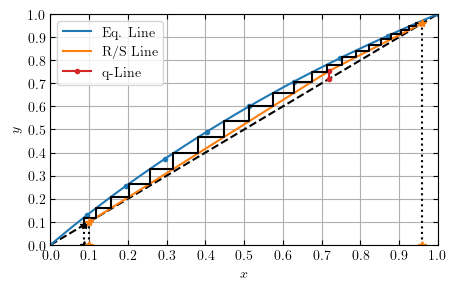

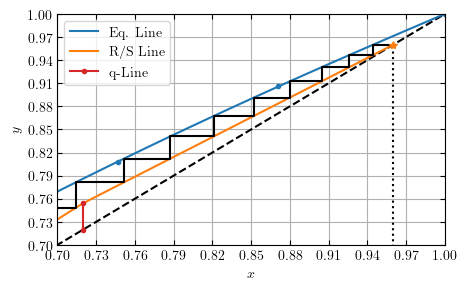

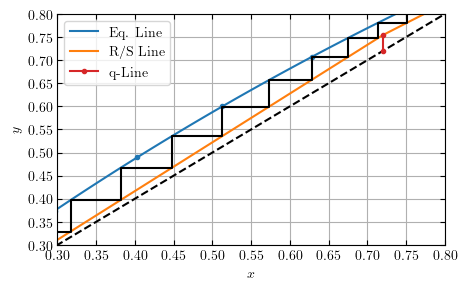

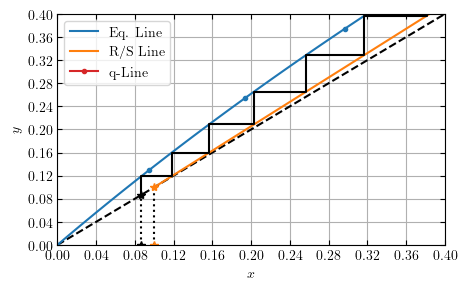

Bottoms Composition: 0.087
0.7542857142857143
1.0552995391705071
-0.005529953917050712


In [10]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
R = 6
xq = xF

# Distillate, Bottoms Flow
D = F*(xF-xB)/(xD-xB)
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
yq = mR*xq + bR


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_8_6.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_8_7.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_8_8.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_8_9.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(yq)
print(mS)
print(bS)

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


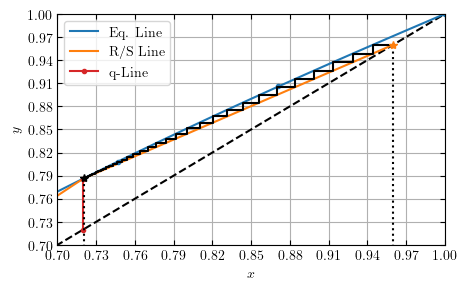

Bottoms Composition: 0.720
0.7861223488663964
0.7244902130566815
2.6296351251062204


In [11]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr

xq = xF
yq = y(xq)

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line,max_iter=50)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],eq_min='false',title='CHEN_3100_HW_8_10.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(yq)
print(mR)
print(mR/(1-mR))

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


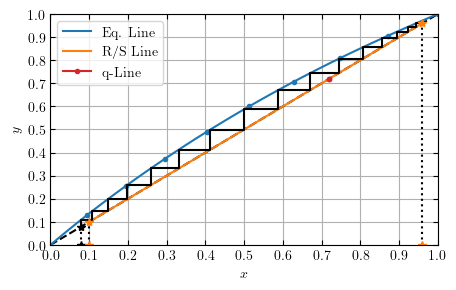

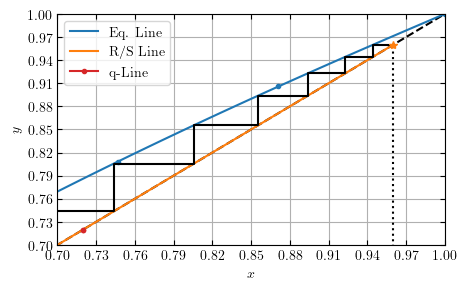

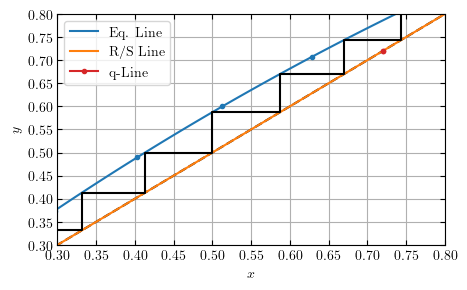

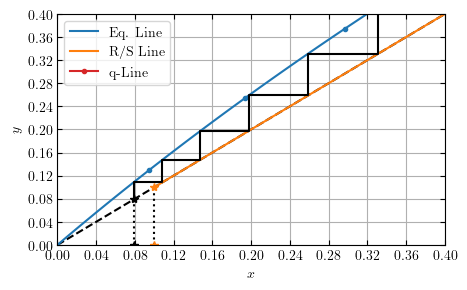

Bottoms Composition: 0.079


In [12]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr

xq = xF
yq = xq

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line,max_iter=50)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_8_11.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_8_12.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_8_13.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_8_14.png')


print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


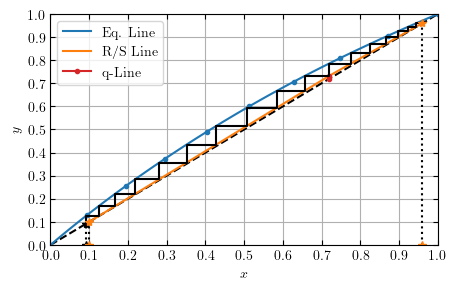

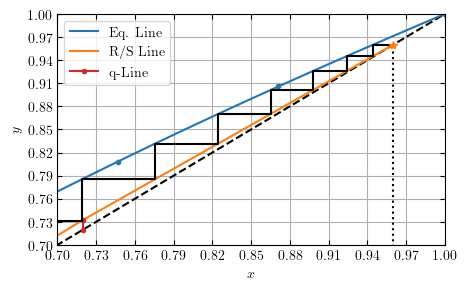

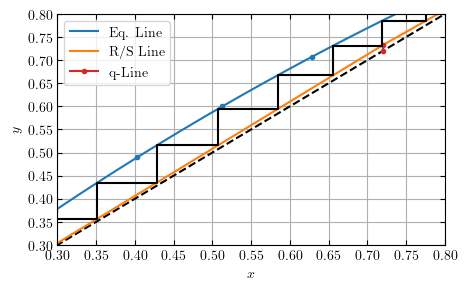

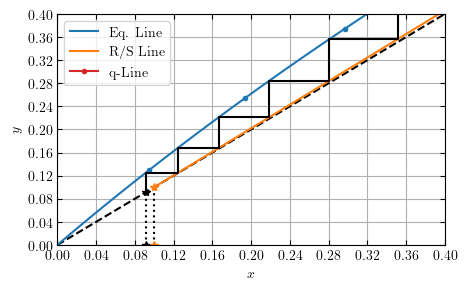

Bottoms Composition: 0.091
0.72
1.0203735144312394
-0.002037351443123936


In [13]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
R = 18
xq = xF
yq = xq

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_8_15.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_8_16.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_8_17.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_8_18.png')


print('Bottoms Composition: %0.3f' % x_eq[-1])

print(yq)
print(mS)
print(bS)

Bottoms Composition: 0.083


C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


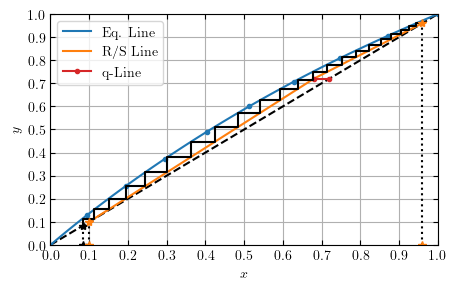

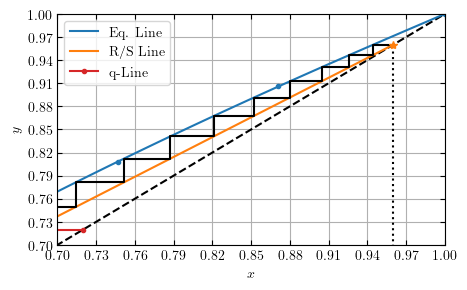

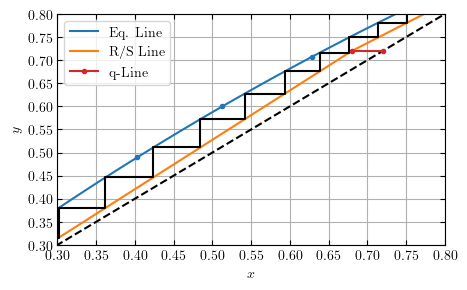

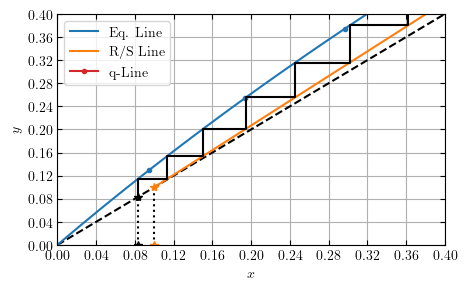

0.72
0.8571428571428572
0.13714285714285715
1.0689655172413794
-0.006896551724137945


In [14]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
R = 6
yq = xF


# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
xq = (yq-bR)/mR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)
print('Bottoms Composition: %0.3f' % x_eq[-1])

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_8_19.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_8_20.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_8_21.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_8_22.png')

print(yq)
print(mR)
print(bR)
print(mS)
print(bS)


Bottoms Composition: 0.643


C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


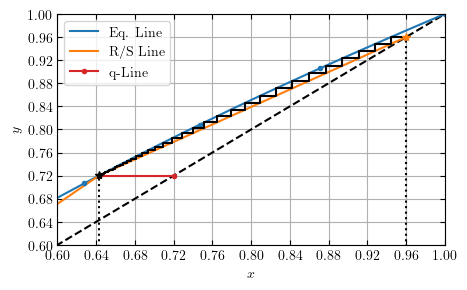

0.6428737208866798
0.756796316820656
3.1117798337888525


In [15]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
yq = xF
sol = root_scalar(lambda x: y(x)-yq,method='secant',x0=xF)
xq = sol.root

# Rectifying slope/intercept
mR = (xD-xF)/(xD-xq)
bR = (1-mR)*xD

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line,max_iter=50)
print('Bottoms Composition: %0.3f' % x_eq[-1])

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.6,1],[0.6,1],eq_min='false',title='CHEN_3100_HW_8_23.png')
print(xq)
print(mR)
print(mR/(1-mR))

Bottoms Composition: 0.093


C:\Users\pheng\AppData\Local\Temp\ipykernel_12788\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


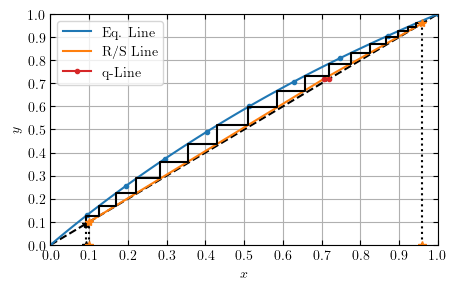

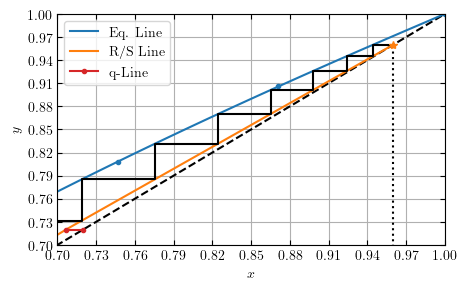

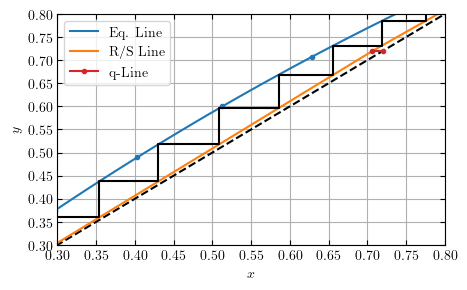

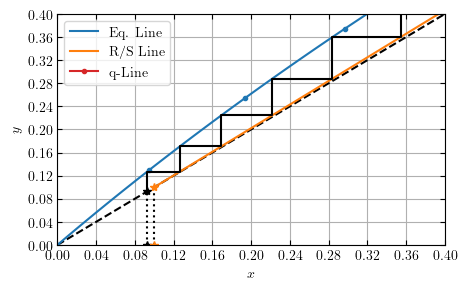

0.72
0.9473684210526316
0.05052631578947368
1.021978021978022
-0.00219780219780219


In [16]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
R = 18
yq = xF


# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
xq = (yq-bR)/mR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)
print('Bottoms Composition: %0.3f' % x_eq[-1])

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_8_24.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_8_25.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_8_26.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_8_27.png')

print(yq)
print(mR)
print(bR)
print(mS)
print(bS)